In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import emcee
import corner
from IPython.display import display, Math
import statistics as stats        

Histograma de los datos leidos


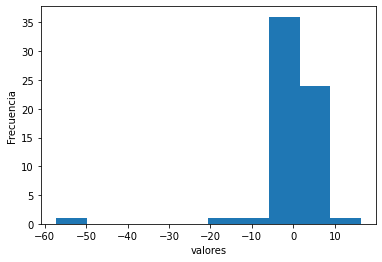

Promedio -0.12812500000000002
Desviacion estandar -0.12812500000000002


In [2]:
print('Histograma de los datos leidos')


data = np.loadtxt("demo.dat")
counts, bins = np.histogram(data)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('valores')
plt.ylabel('Frecuencia')
plt.show()
mean = stats.mean(data)
des = stats.pstdev(data)

print('Promedio',mean)
print('Desviacion estandar',mean)
#counts ----> cuentos datos hay en cada intervalo
#bins---->intervalos

# Definimos las funciones que vamos a ocupar:

Por ejemplo, primero definimos nuestra función prior, es decir un intervalo constante en lo que nos importa.

Es una función de distribucion de probabilidad uniforme *prior*

$ P(\alpha|\beta, I)=\left\lbrace\begin{array}{c} C=cte.\quad \quad -2\leq\alpha\leq2 \quad \quad 0\leq\beta\leq2\\ 0 \end{array}\right.$

E

In [3]:
def log_prior(theta):
    alpha, beta = theta
    if -2.0 < alpha < 2.0 and 0.0 < beta < 2.0 :
        return 0.0
    return -np.inf

Ahora vamos a definir nuestra Likehood, en este caso es la siguiente:

## $P(x_k|\alpha,\beta,I)=\dfrac{\beta}{\pi([x_k-\alpha]^2)+\beta^2}$ 
## $L=constante -\sum \ln{[\beta^2+(x_k-\alpha)^2]} $

def log_likelihood(theta, data): #Definimos una función que dependa de un theta (no se que es), y los parametros 
    alpha, beta = theta #las cosas dentro de nuestra función 
    
    return  - 1.0 * np.sum(np.log(beta**2 + (data - alpha)**2)) #El log de la prob

In [4]:
def log_likelihood(theta, data): #Definimos una función que dependa de un theta (no se que es), y los parametros 
    alpha, beta = theta #las cosas dentro de nuestra función 
    
    aux = 0.
    lnLikelihood1=0.
    for n in range(len(data)): # Realizamos la suma de todos los datos posibles de la L
                aux = np.log(beta) - np.log((( data[int(n)]- alpha )*(data[int(n)]-alpha) + beta*beta))
                lnLikelihood1= lnLikelihood1 + aux
    return  lnLikelihood1 #El log de la prob
   

Vamos a definir el logaritmo de la probabiblidad:

In [5]:
def log_probability(theta, data):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, data)

Ahora si toca hacer lo de Emcee, que voy a copiar, pegar para ver como funciona.

Tuvimos que meter un punto de partida para los parametros:


In [6]:
# Aquí damos un vector en el espacio de parámetros para ayudar al programa a compilar más rápido. Si hay ajustes previos, aquí puede ir los parámetros estimados en ese anális

Par1_true = 1.0   #Posición en alpha
Par2_true = 1.35410534898686746  #Posición en beta

In [7]:
result = np.array([Par1_true, Par2_true]) #punto de partida en el espacio de parámetros
result

array([1.        , 1.35410535])

In [8]:
np.random.seed(101)

In [9]:
ndim, nwalkers = 2, 30
pos = [result + 1e-2 * np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=[data]
)
sampler.run_mcmc(pos, 1500, progress=True)

100%|██████████| 1500/1500 [00:12<00:00, 124.46it/s]


State([[1.2542007  0.99370453]
 [1.30827785 1.16002168]
 [1.27139653 1.13749503]
 [1.26625032 0.78947794]
 [1.04292394 1.01854104]
 [1.29866613 1.22912383]
 [1.0849239  0.97303821]
 [1.00515471 1.33251559]
 [1.59222288 1.05633505]
 [1.22913546 0.92568743]
 [1.31827227 1.04906033]
 [1.69016957 0.97763968]
 [1.09360766 1.00062403]
 [1.16065402 1.1428418 ]
 [1.29410322 1.00205554]
 [1.15595753 0.69255959]
 [1.43452232 0.99490077]
 [1.46615509 1.33045339]
 [0.9756989  1.33719193]
 [1.36139118 0.88775237]
 [1.19872625 0.71293527]
 [1.10617534 1.25162251]
 [1.32502284 0.98218665]
 [0.91658314 1.02495948]
 [0.94935725 1.10318594]
 [1.37909573 1.42768321]
 [1.53208734 0.92703804]
 [1.46197026 0.87808495]
 [1.21775855 1.08751684]
 [1.07370713 0.97026525]], log_prob=[-83.2169947  -83.97484145 -83.78754458 -83.5351399  -84.02733729
 -84.40239647 -83.717546   -85.67395699 -85.41884591 -83.16592035
 -83.45654912 -86.66840635 -83.6852988  -83.8924173  -83.2646766
 -84.85675298 -83.80937146 -85.88111

Ahora vamos a graficar como oscilan los resultados:

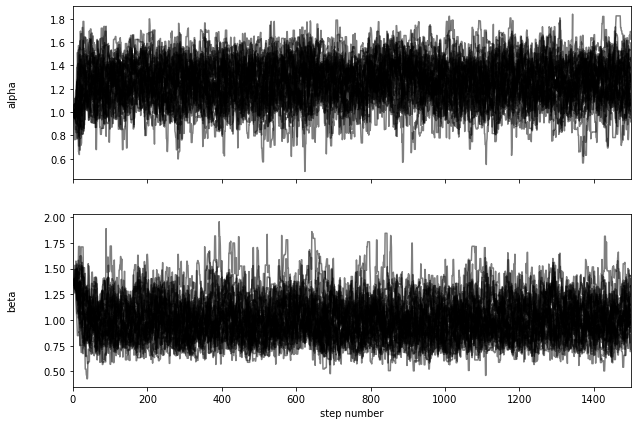

In [10]:
 fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["alpha", "beta"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.5)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

/Users/Viry/opt/anaconda3/lib/python3.8/site-packages/arviz/data/base.py:216: UserWarning: More chains (1500) than draws (30). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


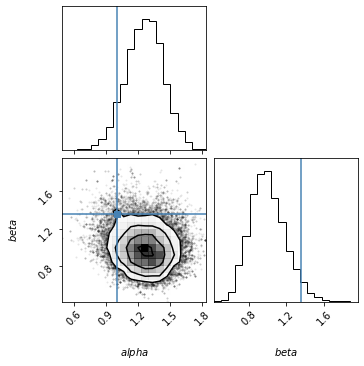

In [11]:
fig = corner.corner(samples, labels=["$alpha$", "$beta$"],
                      truths=[Par1_true, Par2_true])

plt.show()
# fig.savefig("CredReg_Om_wde_w_Ho_OmBh2-PS1-BAO8p-CMBR_.jpeg")
#fig.savefig("CredReg_Om_wde_w_Ho_OmBh2-PS1-BAO8p-CMBR_.png")

plt.close()

In [12]:
for i in range(ndim):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/Users/Viry/opt/anaconda3/lib/python3.8/site-packages/arviz/data/base.py:216: UserWarning: More chains (1500) than draws (30). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


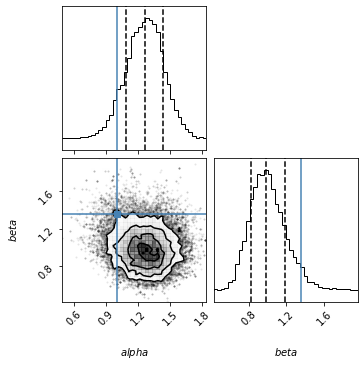

In [13]:
fig = corner.corner(samples, labels=["$alpha$", "$beta$"],
                      truths=[Par1_true, Par2_true],
                      quantiles=[0.16, 0.50, 0.84], 
                      bins=40,
                      plot_datapoints = True,
                      scale_hist=True)

# fig.savefig("CredReg_Bin40_.jpeg") 
# fig.savefig("CredReg_Q_Bin50_.png") 
plt.show() # OK.

plt.close()

In [14]:
np.mean(samples, axis=0)

array([[1.23484594, 1.01958262],
       [1.24185386, 1.01241509],
       [1.24482726, 0.95291148],
       [1.23734264, 1.00132008],
       [1.25874989, 1.01644543],
       [1.2455452 , 1.00001677],
       [1.26301742, 0.99522765],
       [1.23710771, 0.9760571 ],
       [1.27067344, 1.02713627],
       [1.22867713, 1.02032473],
       [1.29127227, 1.04711036],
       [1.27938057, 0.98905447],
       [1.23581651, 1.02071206],
       [1.29198722, 0.95280283],
       [1.26565736, 1.01602286],
       [1.30324751, 1.01458447],
       [1.26536118, 0.9598641 ],
       [1.24719249, 1.01589802],
       [1.28373608, 0.99776453],
       [1.29422149, 0.97877012],
       [1.25458387, 1.00086219],
       [1.2634189 , 1.02770357],
       [1.21167772, 0.9866618 ],
       [1.21341786, 1.00863719],
       [1.25816582, 0.99301531],
       [1.25894371, 1.00498026],
       [1.27306323, 1.01052339],
       [1.29056979, 0.96743445],
       [1.26948999, 1.00792099],
       [1.25013731, 1.01389981]])

In [15]:
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
from getdist import loadMCSamples
import getdist
# use this *after* importing getdist if you want to use interactive plots
# %matplotlib notebook
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
# matplotlib 2 may not work very well without usetex on, can uncomment
# plt.rcParams['text.usetex']=True

GetDist Version: 1.3.2, Matplotlib version: 3.3.4


In [16]:
names=["alpha","beta"]
labels=["alpha","beta"]
samples1 = MCSamples(samples=sampler.chain, ignore_rows=300, names=names, labels=labels)  #quemamos el 30% de las cadenas resultantes

Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in
Removed 300 lines as burn in


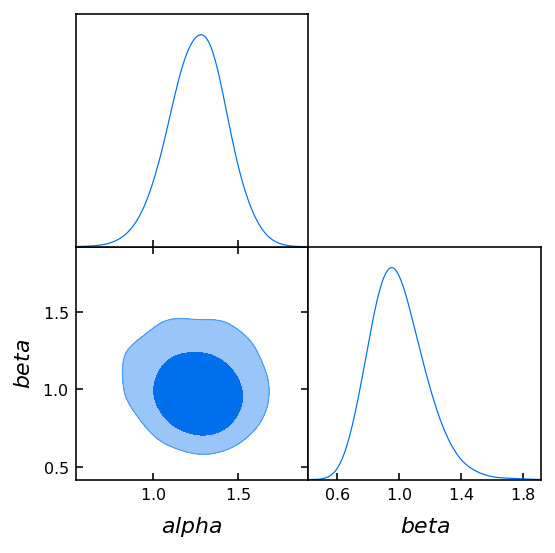

In [17]:
#Gráfica triangular. Todos los parámetros. 
g = plots.get_subplot_plotter()
g.triangle_plot([samples1], filled=True, markers={'M':-1.0})